[ 대구에서 타지역으로 이동한 추세 분석 ] <hr>

In [56]:
# 데이터셋 : 시도별 전출입 인구수.xlsx
# 타겟/라벨 : 대구광역시
# 피쳐/속성 : 대구광역시 인덱스를 제외한 나머지 => 탐색적 분석을 통해서 주요 특성 선택 

[ 모듈 로딩 및 데이터 불러오기 ]

In [57]:
# 모듈 로딩
import pandas as pd                # 데이터 분석 및 전처리용 모듈
import numpy as np
import matplotlib.pyplot as plt    # 데이터 시각화, 그래프 관련 모듈

In [58]:
# 데이터 불러오기
moving=r'../DATA/시도별 전출입 인구수.xlsx'
move=pd.read_excel(moving)

[ 데이터 확인 ]

In [59]:
# 데이터 요약 정보 확인 
move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [60]:
# 실제 데이터 확인 
move

전출지별     전입지별      1970      1971      1972      1973      1974      1975  \
0    NaN      NaN  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1     전국       전국   4046536   4210164   3687938   4860418   5297969   9011440   
2    NaN    서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3    NaN    부산광역시    448577    389797    362202    482061    680984    805979   
4    NaN    대구광역시         -         -         -         -         -         -   
..   ...      ...       ...       ...       ...       ...       ...       ...   
320  NaN     전라북도       139       202       141       210       219       415   
321  NaN     전라남도       631       965       857       952      1133      2808   
322  NaN     경상북도       374       619       468       576       625      1123   
323  NaN     경상남도       474       479       440       571      1208      1517   
324  NaN  제주특별자치도      9290     12427     12210     16158     19580     34221   

         1976      1977  ...      2008      2009      2010      2011  \
0    이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1     6773250   7397623  ...   8808256   8487275   8226594   8127195   
2     2756510   2893403  ...   2025358   1873188   1733015   1721748   
3      724664    785117  ...    514502    519310    519334    508043   
4           -         -  ...    409938    398626    370817    370563   
..        ...       ...  ...       ...       ...       ...       ...   
320       392       408  ...       668       579       672       561   
321      2608      2652  ...      1143      1123      1002      1026   
322      1141      1004  ...       761       704       738       756   
323       863      1122  ...      1517      1474      1324      1367   
324     23291     31028  ...     59564     55673     55507     59846   

         2012      2013      2014      2015      2016      2017  
0    이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  
1     7506691   7411784   7629098   7755286   7378430   7154226  
2     1555281   1520090   1573594   1589431   1515602   1472937  
3      461042    478451    485710    507031    459015    439073  
4      348642    351873    350213    351424    328228    321182  
..        ...       ...       ...       ...       ...       ...  
320       551       516       609       683       733       768  
321       966      1001       928      1062      1127      1102  
322       699       781       728       903       931       994  
323      1227      1278      1223      1500      1448      1501  
324     54280     60607     59673     59036     66444     63275  

[325 rows x 50 columns]

[ 필요한 데이터 추출 ]

In [61]:
# 1970 ~ 1980년 데이터가 없으므로 삭제 
move.drop(move.columns[2:13],axis=1,inplace=True)

# 전출지별 - 대구광역시를 찾기 = 시작 인덱스 찾기 
print(move[move['전출지별']=='대구광역시'])

# '전출지별' 열 삭제
move.drop(columns='전출지별',inplace=True)

# 대구광역시 -> 대구광역시 이동한 행 삭제
move.drop(index=[58],inplace=True)

# 전출지가 대구광역시인 데이터 추출
daegu=move.iloc[55:72]

daegu.set_index(['전입지별'],inplace=True)
daegu

# Warning 해결법 : .copy() 메서드 사용해보기 - 복사본을 수정하면 원본에는 영향을 미치지 않기 때문


     전출지별 전입지별    1981    1982    1983    1984    1985    1986    1987  \
55  대구광역시   전국  481534  521117  582412  525143  518560  513581  570103   

      1988  ...    2008    2009    2010    2011    2012    2013    2014  \
55  558115  ...  422676  411288  382657  383310  359206  363224  365739   

      2015    2016    2017  
55  364364  337488  333118  

[1 rows x 39 columns]


1981    1982    1983    1984    1985    1986    1987    1988  \
전입지별                                                                      
전국       481534  521117  582412  525143  518560  513581  570103  558115   
서울특별시     19760   23725   32205   28897   25736   21724   20130   22080   
부산광역시     10590   10732   10512   10804   10696   10114   10496   10019   
인천광역시      1440    1640    1921    1927    2036    1922    2074    1927   
광주광역시         0       0       0       0       0     517     529     629   
대전광역시         0       0       0       0       0       0       0       0   
울산광역시         0       0       0       0       0       0       0       0   
세종특별자치시       0       0       0       0       0       0       0       0   
경기도        4885    6273    8204    7742    7622    8341    9169    9005   
강원도        3333    3211    3099    2883    2961    2928    2360    2135   
충청북도       1748    1805    1933    1692    1632    1655    1847    1637   
충청남도       2427    2983    3057    3250    3211    3280    3340    3164   
전라북도       1594    1649    1638    1377    1552    1553    1424    1174   
전라남도       1875    1782    1812    1933    1751    1526    1461    1173   
경상북도      70840   58430   63729   57719   61250   61419   71529   72574   
경상남도      14182   14746   15522   15649   14750   14816   15424   14707   
제주특별자치도     294     338     525     408     391     398     466     458   

           1989    1990  ...    2008    2009    2010    2011    2012    2013  \
전입지별                     ...                                                   
전국       517090  528024  ...  422676  411288  382657  383310  359206  363224   
서울특별시     21201   19521  ...   14824   15469   13915   13310   13838   13673   
부산광역시      8789    8848  ...    5066    5207    5050    4906    5216    5543   
인천광역시      2272    2438  ...    2125    2003    1968    2000    1979    2202   
광주광역시       704     620  ...     563     624     527     577     711     622   
대전광역시      2014    2169  ...    2106    2057    1956    2063    2144    2219   
울산광역시         0       0  ...    4283    3740    3551    3586    3844    3833   
세종특별자치시       0       0  ...       0       0       0       0     261     233   
경기도        9368   10022  ...   13724   14534   14596   13320   13581   13659   
강원도        2257    2295  ...    1996    1942    2039    1843    1807    1820   
충청북도       1862    1858  ...    1762    1880    1784    1849    1943    1958   
충청남도       1218    1303  ...    2717    2579    2730    2647    2706    2599   
전라북도       1066    1043  ...     970     935     860    1003     878     985   
전라남도       1335    1159  ...     904    1012     985     947     977     948   
경상북도      62765   73655  ...   48562   49288   47895   49300   44922   45035   
경상남도      14144   14981  ...   11343   10599    9521    8821    8965    8941   
제주특별자치도     483     654  ...     618     664     631     643     773     847   

           2014    2015    2016    2017  
전입지별                                     
전국       365739  364364  337488  333118  
서울특별시     13735   13038   12802   13011  
부산광역시      6157    5182    4860    4840  
인천광역시      2015    1987    1962    1930  
광주광역시       902     629     547     515  
대전광역시      2254    2085    1949    1978  
울산광역시      3835    3675    3266    2604  
세종특별자치시     526     879     642     827  
경기도       12813   12322   11918   12354  
강원도        1884    1884    1748    1657  
충청북도       2026    1957    1771    1824  
충청남도       2682    2509    2323    2578  
전라북도        996     940     920     911  
전라남도        985     953     907     897  
경상북도      51852   46900   41444   41714  
경상남도       9374    8922    8313    7704  
제주특별자치도    1061    1317    1394    1631  

[17 rows x 37 columns]

[ 데이터 재확인 ]

In [62]:
# 데이터 요약 정보 확인
daegu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 전국 to 제주특별자치도
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1981    17 non-null     object
 1   1982    17 non-null     object
 2   1983    17 non-null     object
 3   1984    17 non-null     object
 4   1985    17 non-null     object
 5   1986    17 non-null     object
 6   1987    17 non-null     object
 7   1988    17 non-null     object
 8   1989    17 non-null     object
 9   1990    17 non-null     object
 10  1991    17 non-null     object
 11  1992    17 non-null     object
 12  1993    17 non-null     object
 13  1994    17 non-null     object
 14  1995    17 non-null     object
 15  1996    17 non-null     object
 16  1997    17 non-null     object
 17  1998    17 non-null     object
 18  1999    17 non-null     object
 19  2000    17 non-null     object
 20  2001    17 non-null     object
 21  2002    17 non-null     object
 22  2003    17 non-null     obj

In [63]:
# 실제 데이터 확인
print(daegu.head())
print(daegu.tail())

         1981    1982    1983    1984    1985    1986    1987    1988    1989  \
전입지별                                                                            
전국     481534  521117  582412  525143  518560  513581  570103  558115  517090   
서울특별시   19760   23725   32205   28897   25736   21724   20130   22080   21201   
부산광역시   10590   10732   10512   10804   10696   10114   10496   10019    8789   
인천광역시    1440    1640    1921    1927    2036    1922    2074    1927    2272   
광주광역시       0       0       0       0       0     517     529     629     704   

         1990  ...    2008    2009    2010    2011    2012    2013    2014  \
전입지별           ...                                                           
전국     528024  ...  422676  411288  382657  383310  359206  363224  365739   
서울특별시   19521  ...   14824   15469   13915   13310   13838   13673   13735   
부산광역시    8848  ...    5066    5207    5050    4906    5216    5543    6157   
인천광역시    2438  ...    2125    2003    1968

In [64]:
# 데이터 결측치 확인
print(daegu.isna().sum())

# 데이터 이상치 확인
for i in daegu.columns:
    print(daegu[i].unique())

1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64
[481534 19760 10590 1440 0 4885 3333 1748 2427 1594 1875 70840 14182 294]
[521117 23725 10732 1640 0 6273 3211 1805 2983 1649 1782 58430 14746 338]
[582412 32205 10512 1921 0 8204 3099 1933 3057 1638 1812 63729 15522 525]
[525143 28897 10804 1927 0 7742 2883 1692 3250 1377 1933 57719 15649 408]
[518560 25736 10696 2036 0 7622 2961 1632 3211 1552 1751 61250 14750 391]
[513581 21724 10114 1922 517 0 8341 2928 1655 3280 1553 1526 61419 14816
 398]
[570103 20130 10496 2074 529 0 9169 2360 1847 3340 1424 1461 71529 15424
 466]
[558115 22080 10019 1927 629 0 9005 2135 1637 3164 1174 1173 72574 14707
 458]
[517090 21

In [65]:
# 데이터 타입 변경

daegu2=daegu.astype('int')

# 타입 확인
daegu2.dtypes

1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

[ 시각화 ]

(37,) (37,)


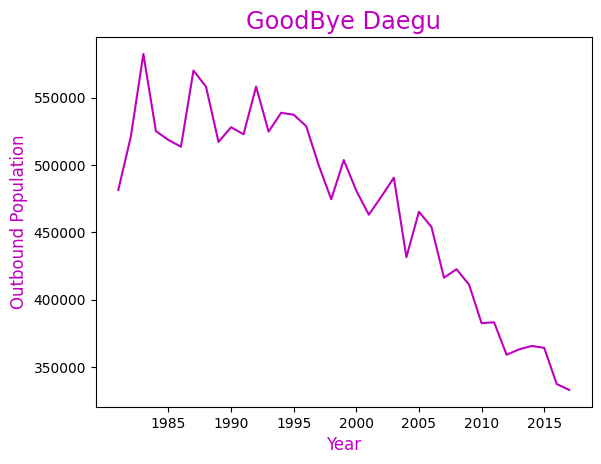

In [66]:
# 대구에서 타지역으로 이동한 추세 분석

# 전국
daegu2=daegu2.T
xdata=daegu2.index
ydata=daegu2['전국']
print(xdata.shape,ydata.shape)
plt.plot(xdata,ydata,'m')
plt.title('GoodBye Daegu', fontdict={'color':'m','size':'xx-large'})
plt.xlabel('Year',fontdict={'color':'m','size':'large'})
plt.ylabel('Outbound Population',fontdict={'color':'m','size':'large'})
plt.xticks(xdata[4::5])
plt.show()

------서울특별시로------


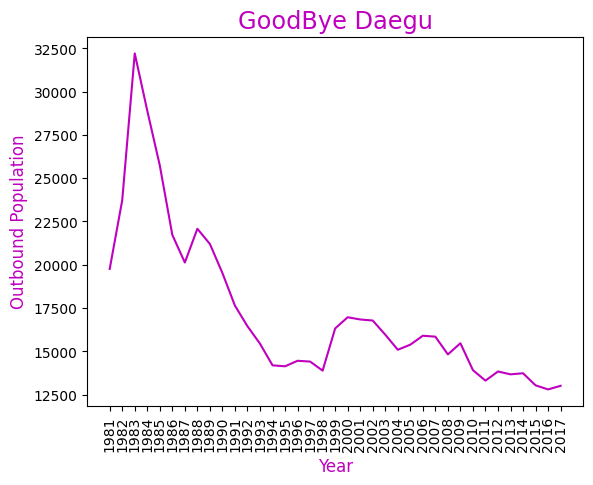

------부산광역시로------


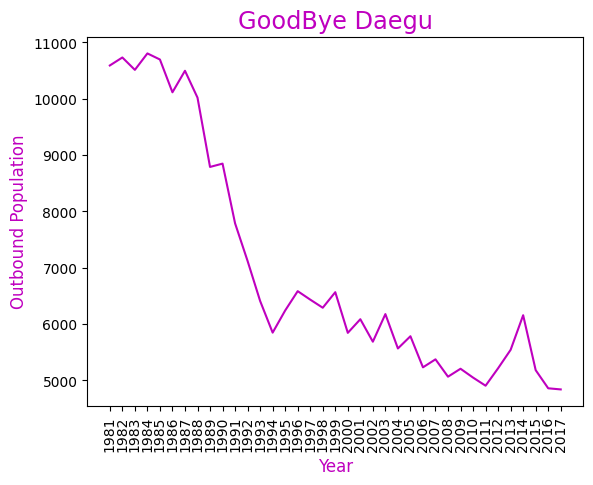

------인천광역시로------


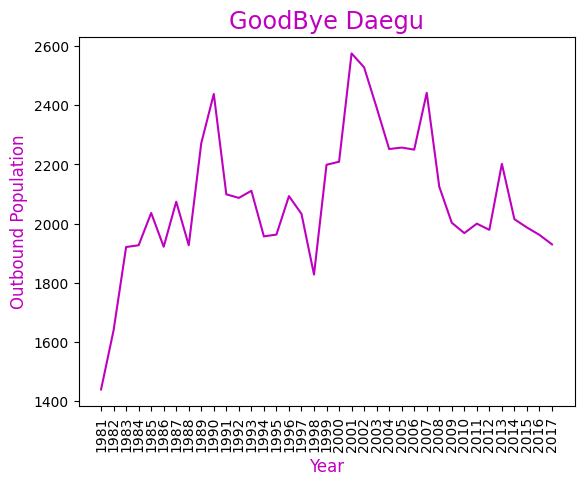

------광주광역시로------


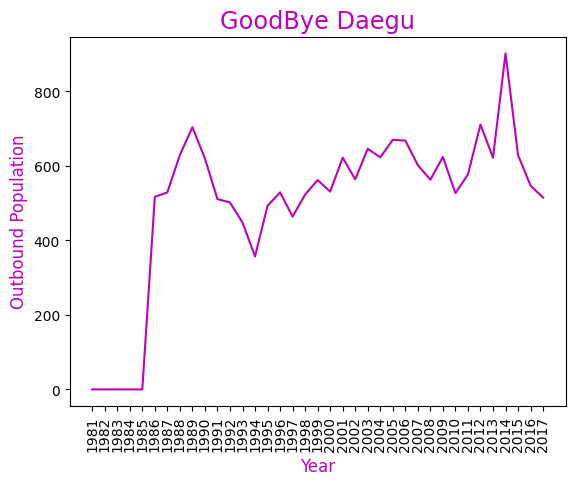

------대전광역시로------


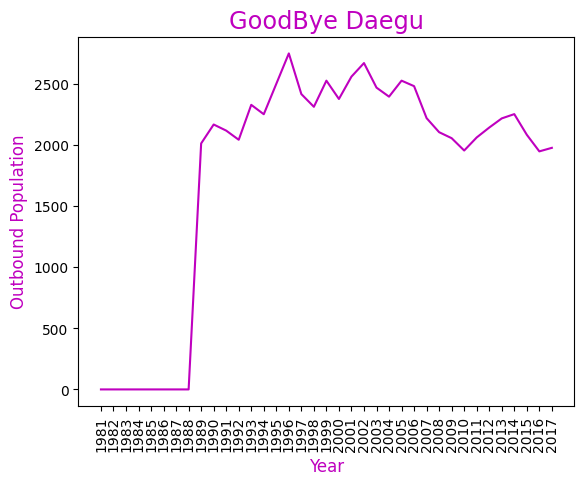

------울산광역시로------


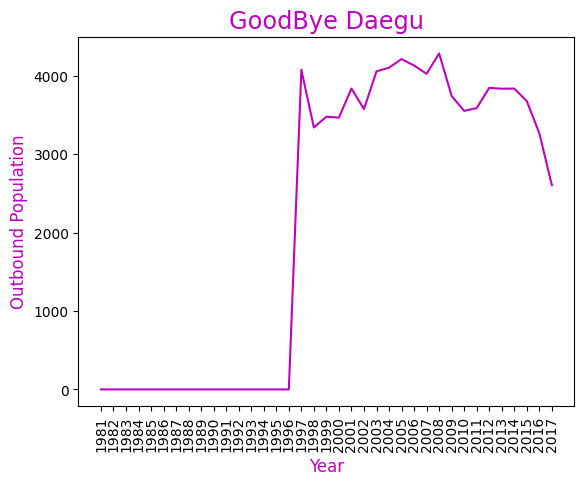

------세종특별자치시로------


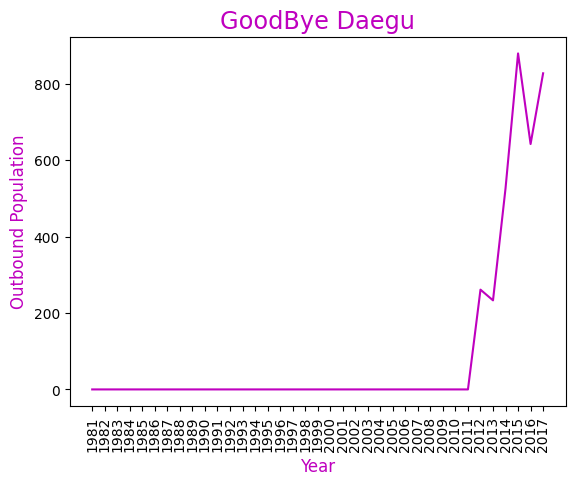

------경기도로------


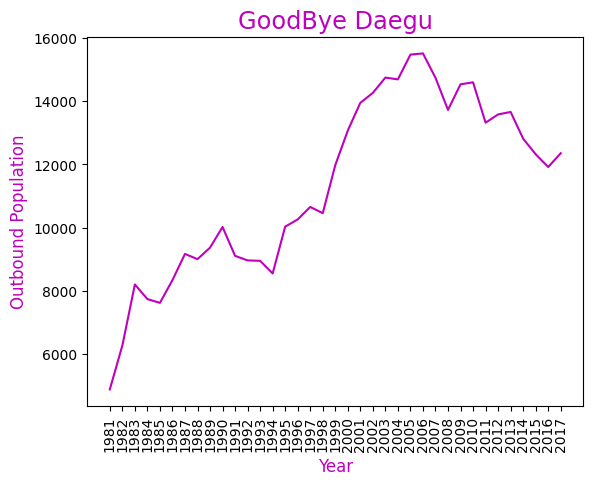

------강원도로------


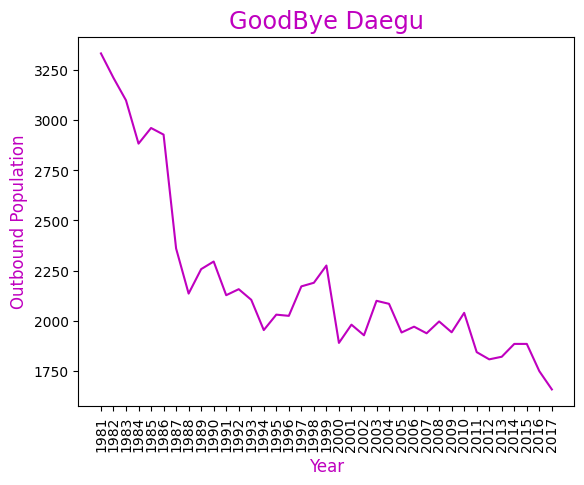

------충청북도로------


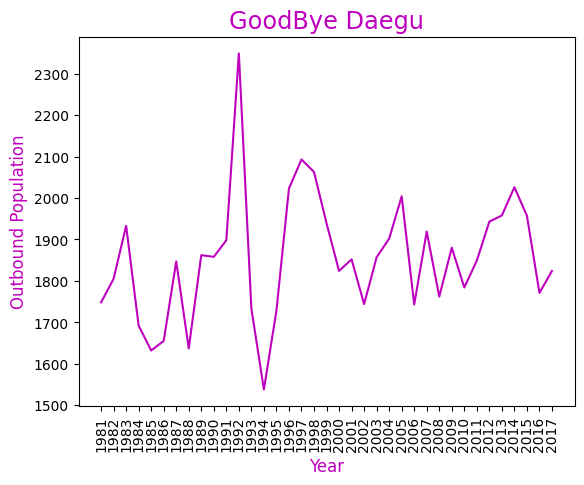

------충청남도로------


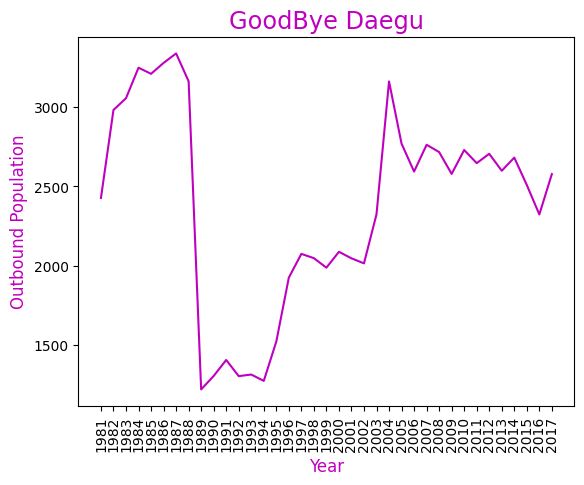

------전라북도로------


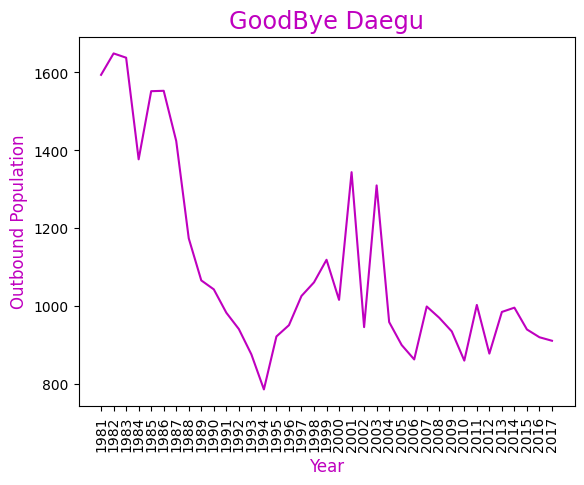

------전라남도로------


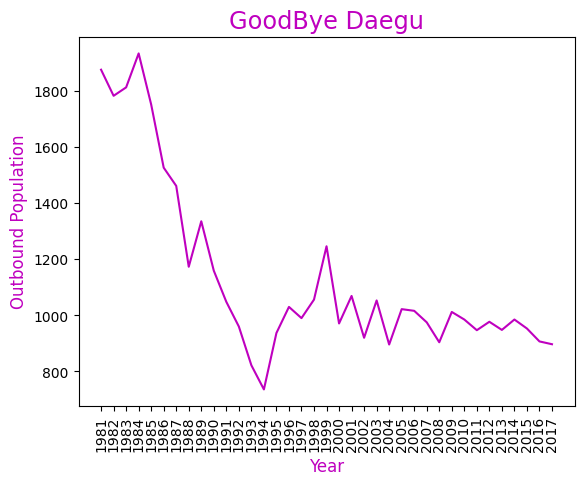

------경상북도로------


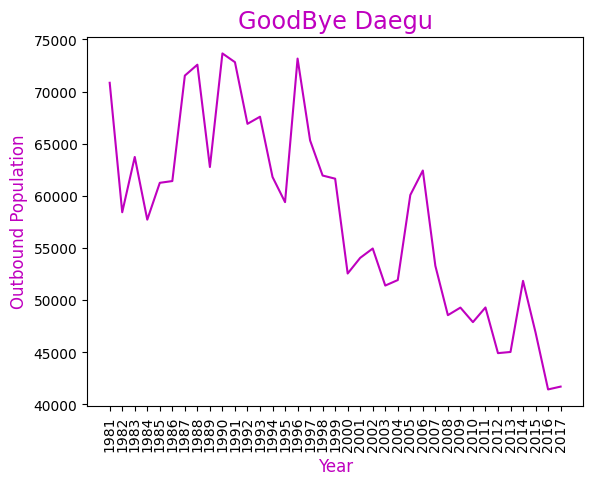

------경상남도로------


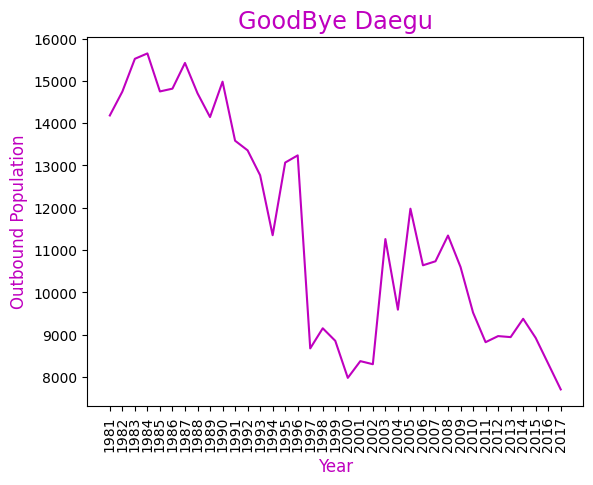

------제주특별자치도로------


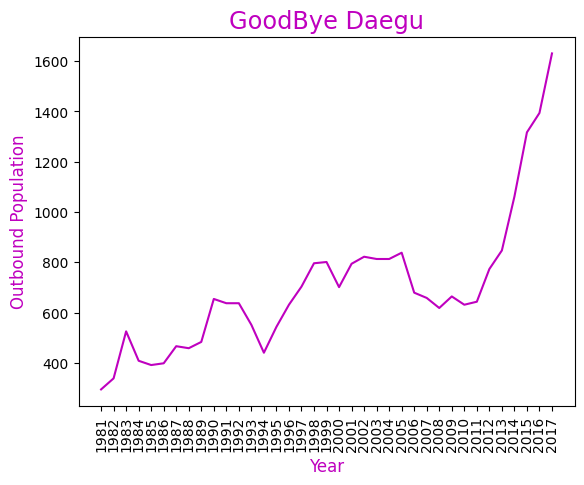

In [67]:
# 지역별
for i in daegu2.columns[1:]:
    xd=daegu2.index
    yd=daegu2[i]
    print(f'------{i}로------')
    plt.plot(xd,yd,'m')
    plt.title('GoodBye Daegu', fontdict={'color':'m','size':'xx-large'})
    plt.xlabel('Year',fontdict={'color':'m','size':'large'})
    plt.ylabel('Outbound Population',fontdict={'color':'m','size':'large'})
    plt.xticks(xdata,rotation=90)
    plt.show()

In [68]:
# 상관계수
corrDF=daegu2[daegu2.columns].corr()
corrDF['전국'].sort_values(ascending=False)[1:]

전입지별
경상북도       0.851205
경상남도       0.750039
부산광역시      0.691328
서울특별시      0.618352
강원도        0.560198
전라남도       0.450653
전라북도       0.447006
인천광역시     -0.021368
충청북도      -0.110390
충청남도      -0.226233
대전광역시     -0.382205
광주광역시     -0.439076
경기도       -0.635796
세종특별자치시   -0.670726
제주특별자치도   -0.716359
울산광역시     -0.734514
Name: 전국, dtype: float64

In [69]:
# 결론
# (1) 전국적으로 대구에서 타지역으로 이동한 인구는 점점 줄어들고 있다. 
# (2) 경상북도 데이터가 양의 상관관계가 가장 높았다. 
# (3) 제주의 경우 제주로의 전출인구가 오히려 꾸준히 증가했으며, 비교적 최근 큰 폭으로 상승했다.
# (4) 음의 상관관계를 보이는 데이터의 경우, 0 데이터가 많았다.